## Cluster of Stock Values in Social Media


**Importing libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from tabulate import tabulate
warnings.simplefilter('ignore')

**Data Preprocessing**

In [104]:
df = pd.read_csv('social media stocks 2012-2022.csv')
df.head(5)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2012-05-18,FB,38.230000,38.230000,45.000000,38.000000,42.049999,573576400.0
1,2012-05-21,FB,34.029999,34.029999,36.660000,33.000000,36.529999,168192700.0
2,2012-05-22,FB,31.000000,31.000000,33.590000,30.940001,32.610001,101786600.0
3,2012-05-23,FB,32.000000,32.000000,32.500000,31.360001,31.370001,73600000.0
4,2012-05-24,FB,33.029999,33.029999,33.209999,31.770000,32.950001,50237200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8398 non-null   object 
 1   Symbol     8398 non-null   object 
 2   Adj Close  8398 non-null   float64
 3   Close      8398 non-null   float64
 4   High       8398 non-null   float64
 5   Low        8398 non-null   float64
 6   Open       8398 non-null   float64
 7   Volume     8398 non-null   float64
dtypes: float64(6), object(2)
memory usage: 525.0+ KB


In [5]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8.398000e+03
mean,74.629153,74.629153,75.854724,73.371072,74.635965,2.013473e+07
std,77.429806,77.429806,78.458779,76.373650,77.421378,2.239180e+07
min,4.990000,4.990000,5.140000,4.820000,4.960000,1.900000e+05
25%,20.832500,20.832500,21.322500,20.342500,20.812500,7.981975e+06
50%,42.830000,42.830000,43.795000,41.873001,42.869999,1.557740e+07
75%,94.387501,94.387501,95.687502,93.344999,94.334999,2.470900e+07
max,382.179993,382.179993,384.329987,378.809998,381.679993,5.735764e+08


In [6]:
df.mean()

Adj Close    7.462915e+01
Close        7.462915e+01
High         7.585472e+01
Low          7.337107e+01
Open         7.463597e+01
Volume       2.013473e+07
dtype: float64

In [7]:
df.skew()

Adj Close    1.677594
Close        1.677594
High         1.673399
Low          1.683814
Open         1.677424
Volume       5.430382
dtype: float64

In [8]:
df.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

**Exploratory Data Analysis**

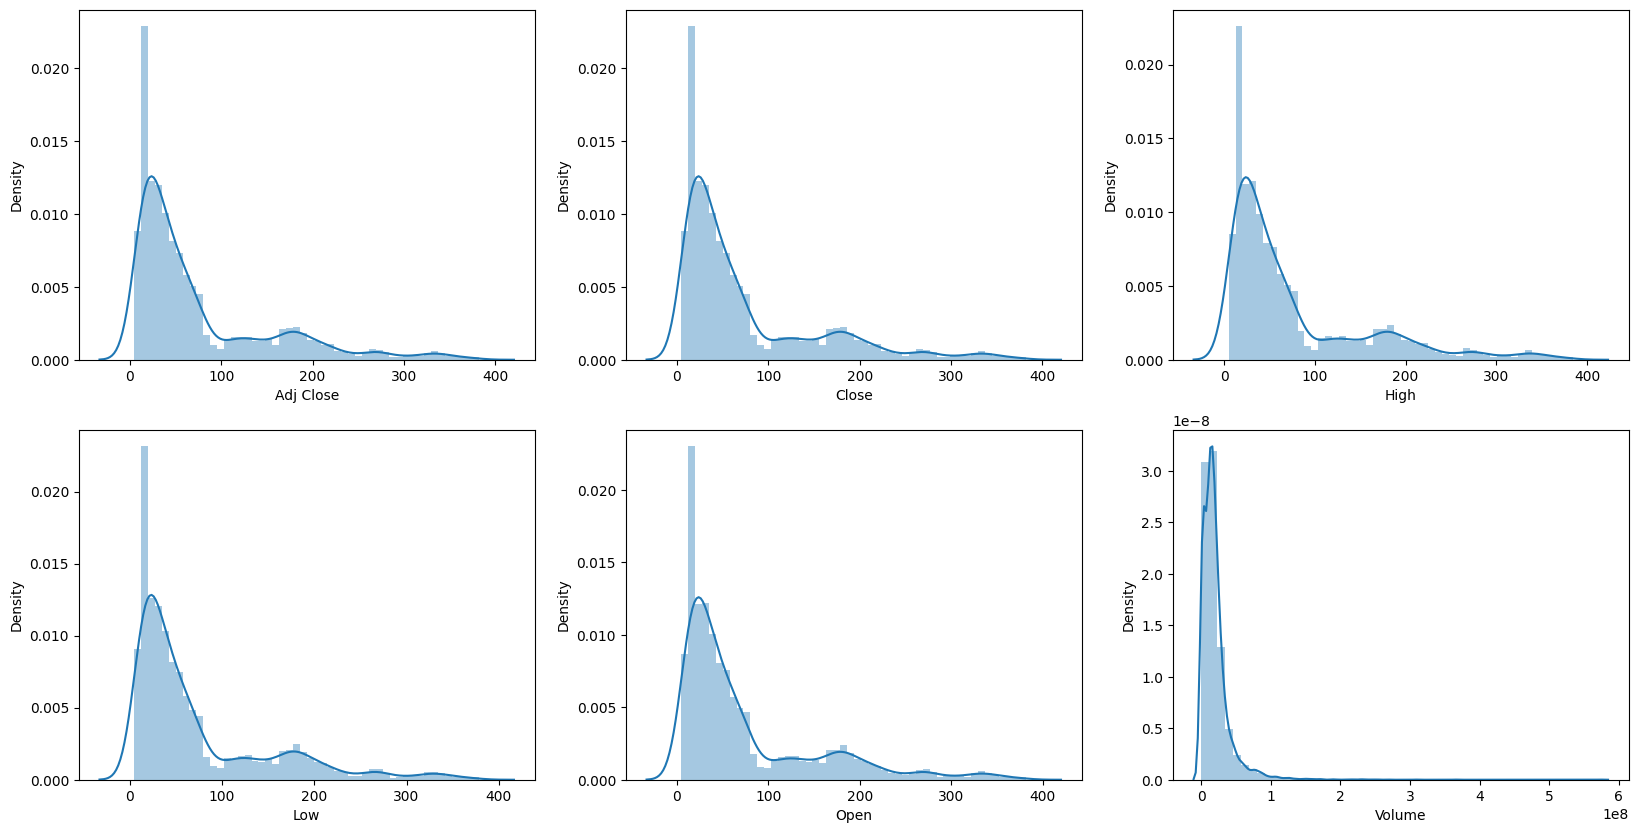

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.distplot(df['Adj Close'],ax=ax[0,0])
sns.distplot(df['Close'],ax=ax[0,1])
sns.distplot(df['High'],ax=ax[0,2])
sns.distplot(df['Low'],ax=ax[1,0])
sns.distplot(df['Open'],ax=ax[1,1])
sns.distplot(df['Volume'],ax=ax[1,2])
plt.show()

<Axes: xlabel='Symbol', ylabel='count'>

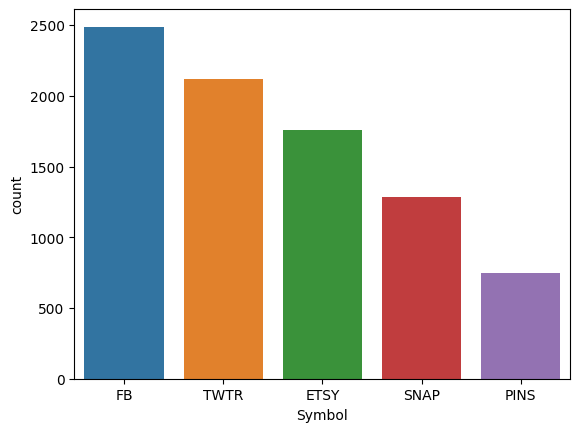

In [10]:
sns.countplot(data = df, x = 'Symbol')

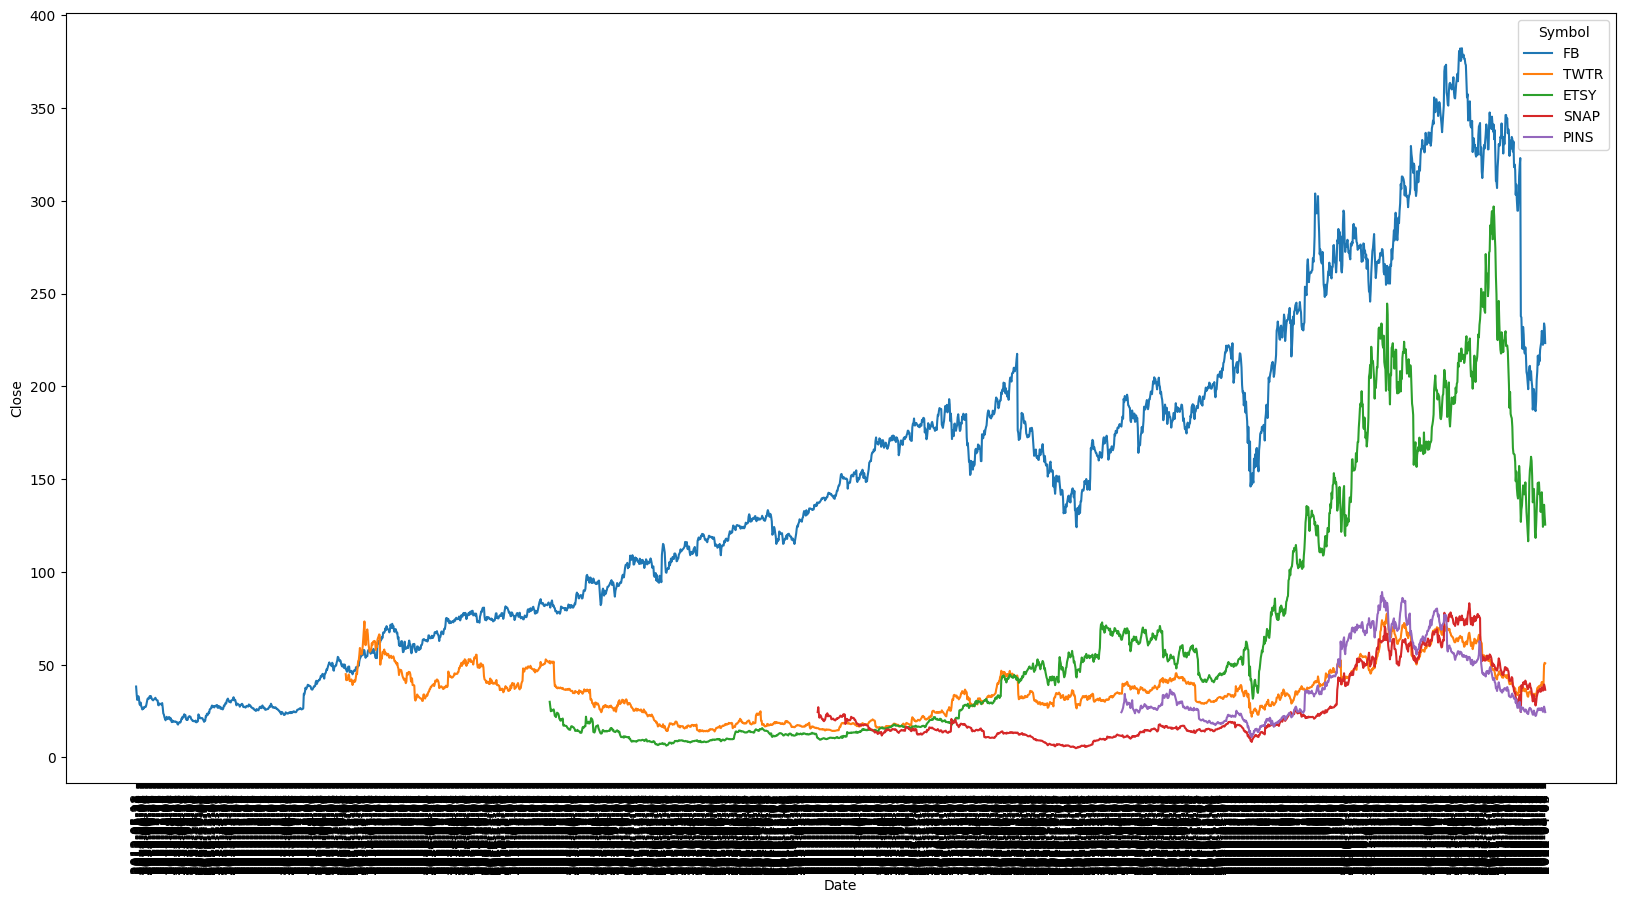

In [32]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='Date', y='Close', hue='Symbol')
plt.xticks(rotation=90)
plt.show()

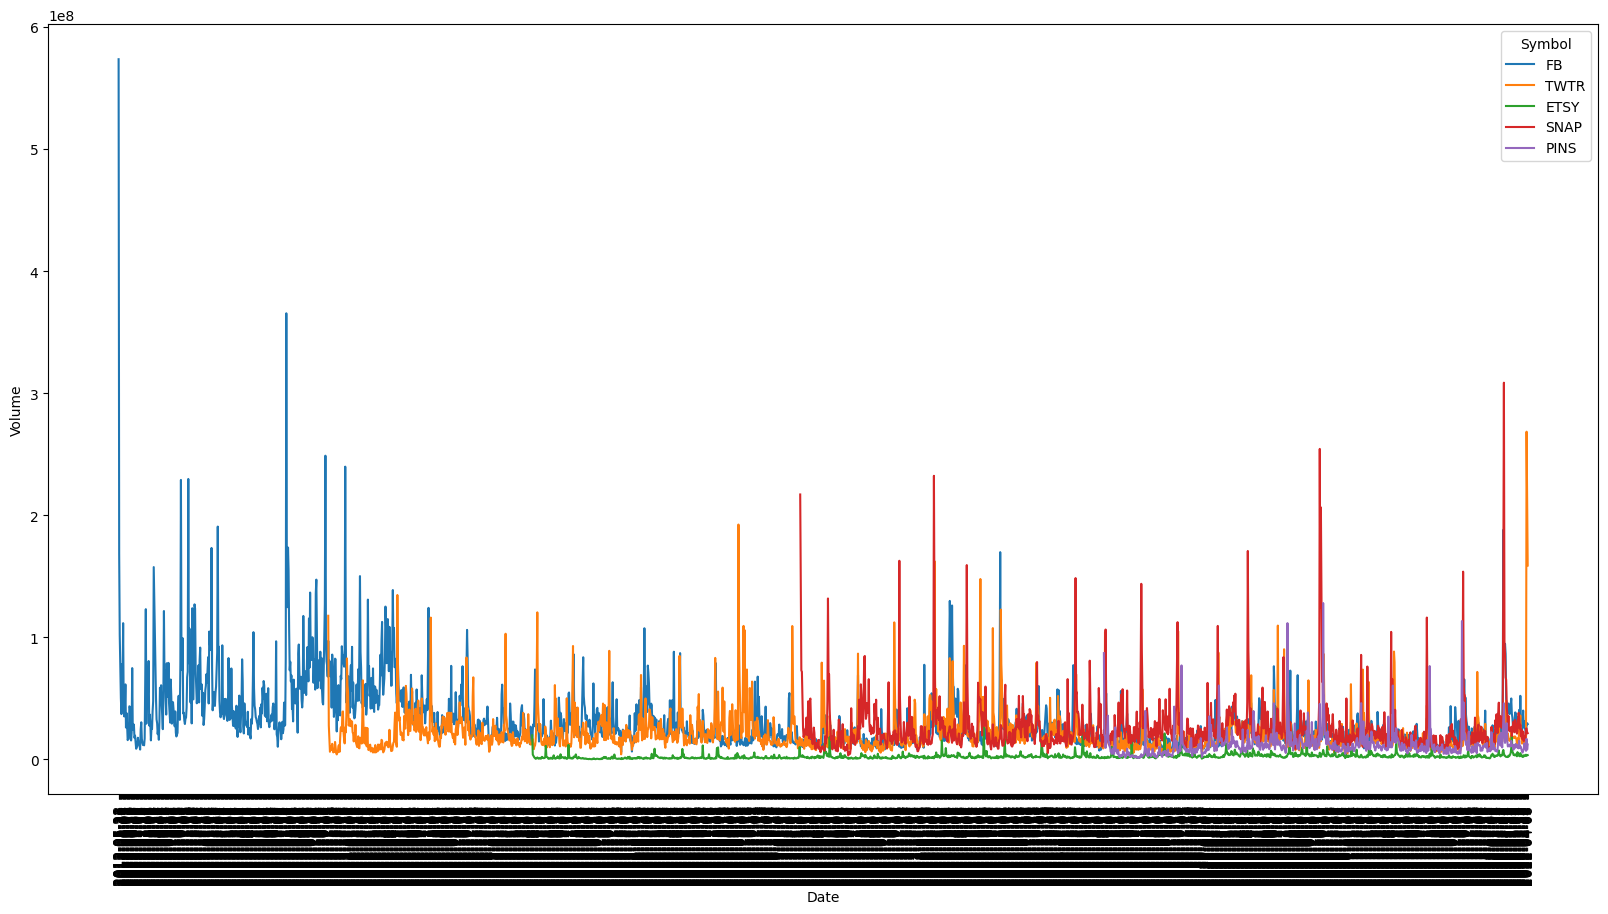

In [33]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='Date', y='Volume', hue='Symbol')
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x1000 with 0 Axes>

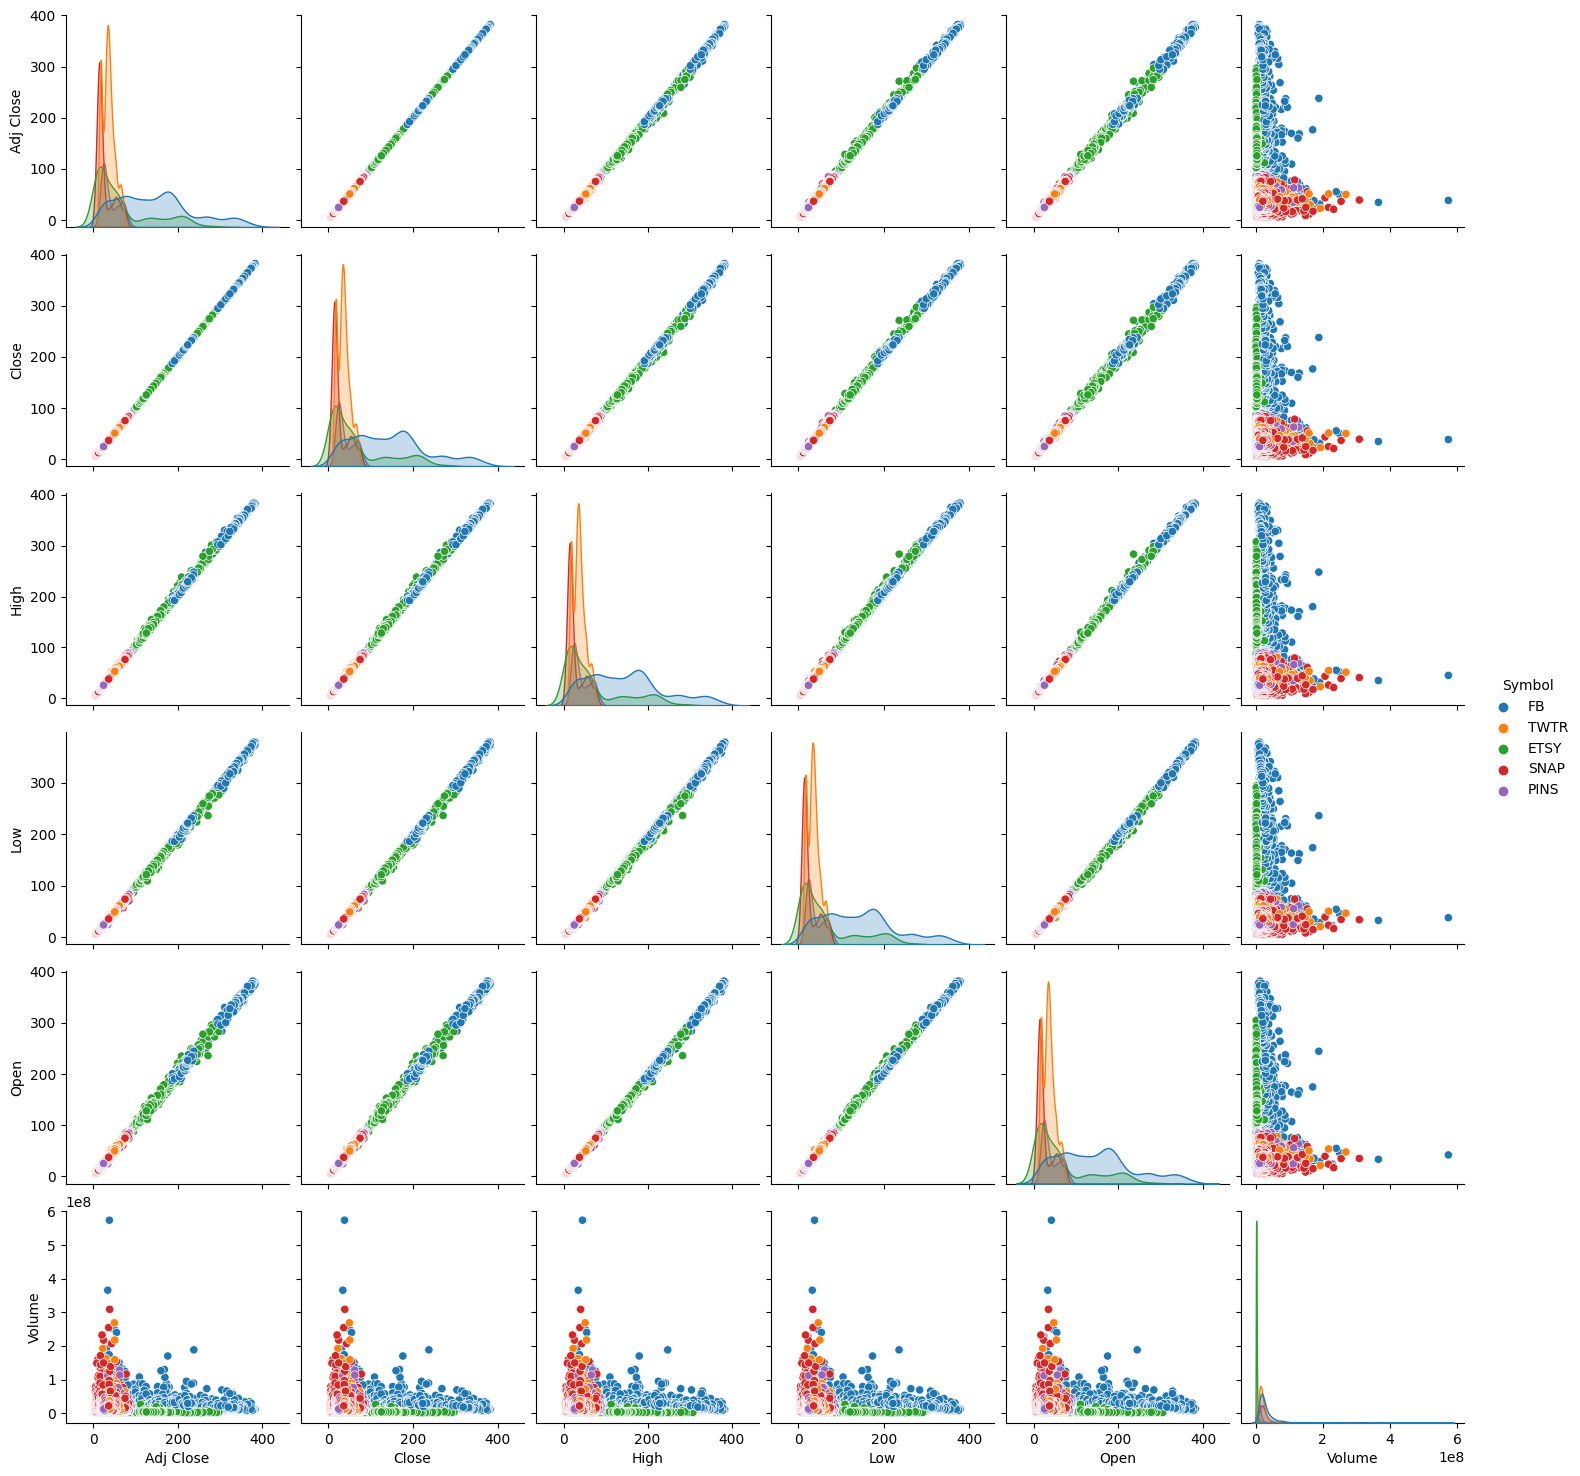

In [43]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue = 'Symbol')
plt.show()

In [ ]:
plt.figure(figsize=(15, 20))
fig = px.scatter(df, x="Close", y="Volume", color="Symbol")
fig.show()

<Figure size 1500x2000 with 0 Axes>

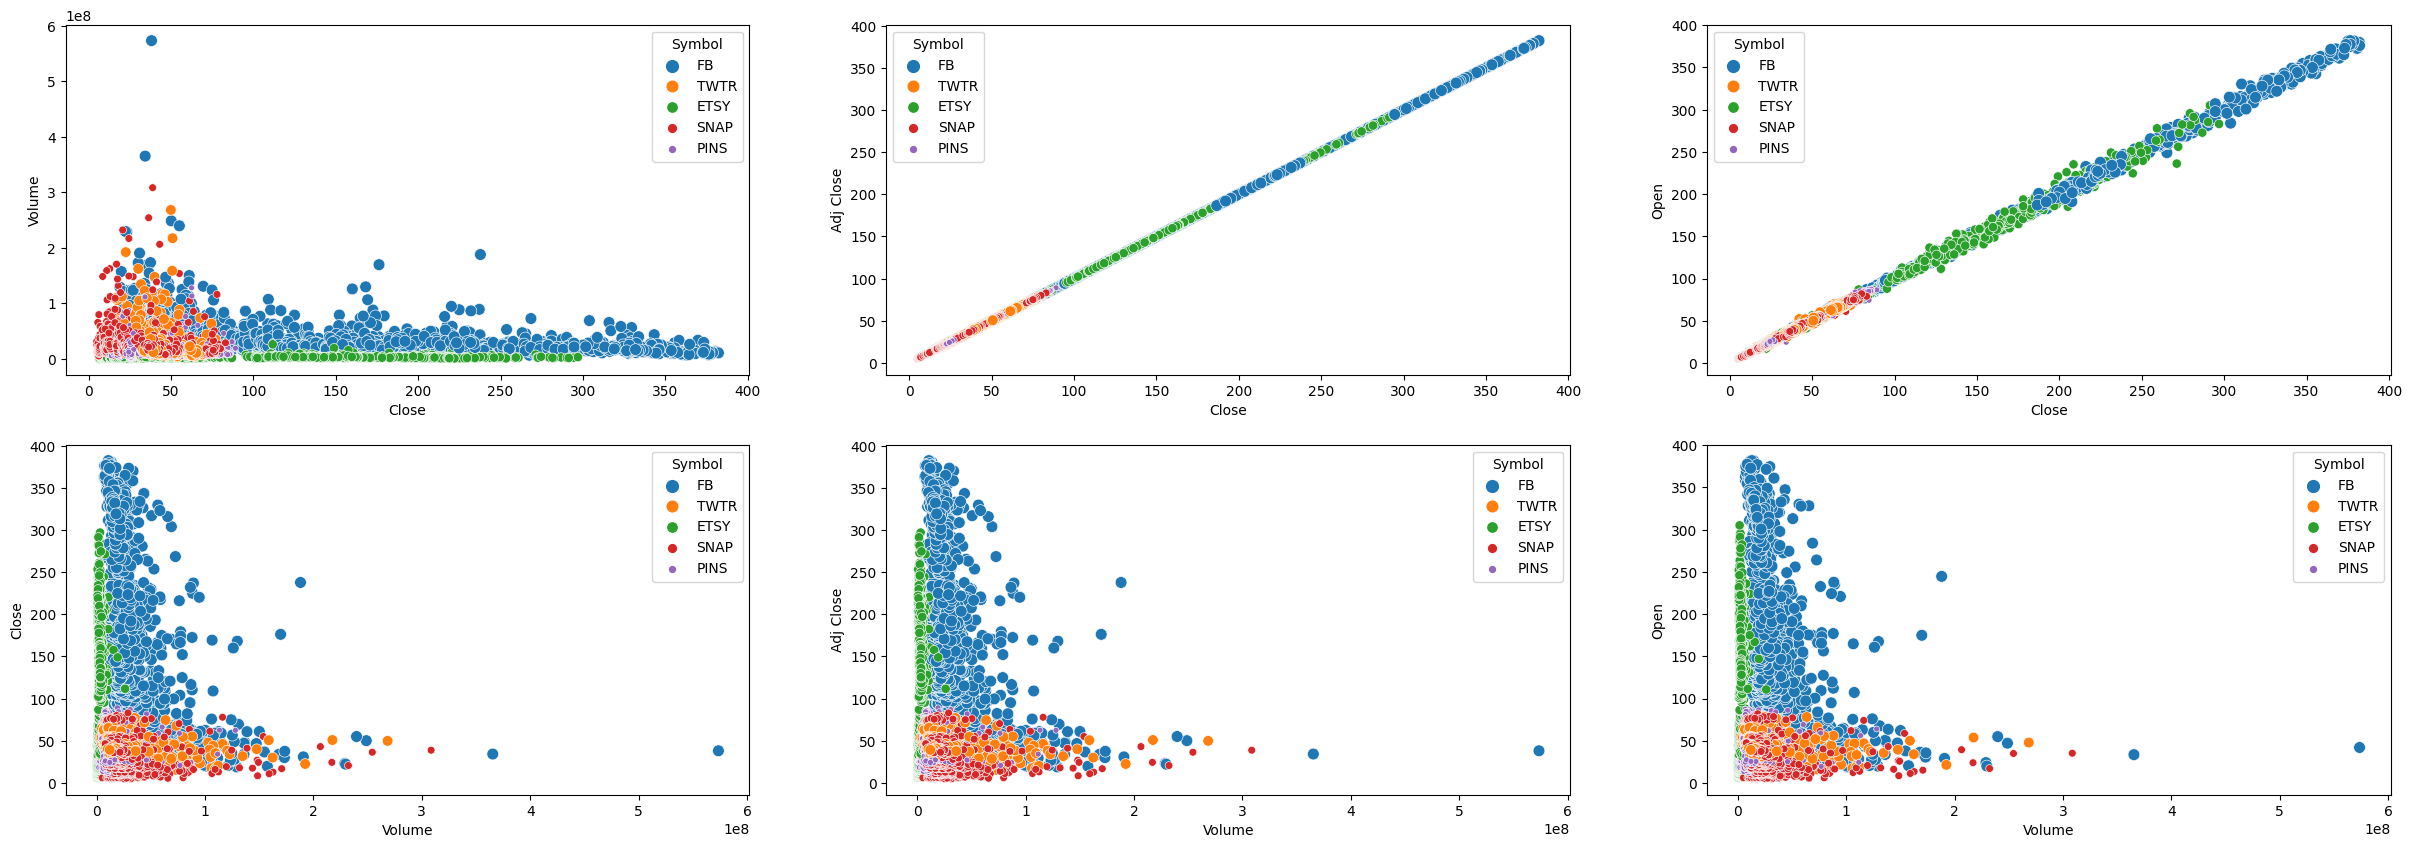

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))

sns.scatterplot(data=df, x="Close", y="Volume", hue='Symbol',  size="Symbol",ax=ax[0,0])
sns.scatterplot(data=df, x="Close", y="Adj Close", hue='Symbol',  size="Symbol",ax=ax[0,1])
sns.scatterplot(data=df, x="Close", y="Open", hue='Symbol',  size="Symbol",ax=ax[0,2])

sns.scatterplot(data=df, x="Volume", y="Close", hue='Symbol',  size="Symbol",ax=ax[1,0])
sns.scatterplot(data=df, x="Volume", y="Adj Close", hue='Symbol',  size="Symbol",ax=ax[1,1])
sns.scatterplot(data=df, x="Volume", y="Open", hue='Symbol',  size="Symbol",ax=ax[1,2])
plt.show()

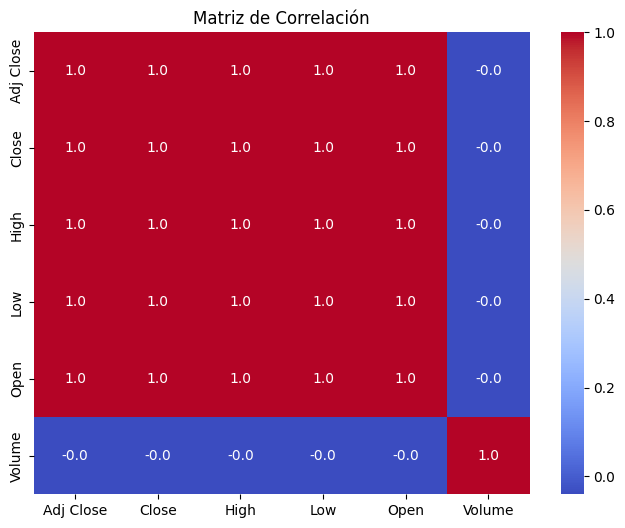

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
fmt='.1f')
plt.title('Matriz de Correlación')
plt.show()

**Data Scaler**

In [105]:
# Split by Campaign Social Media
X_FB =  df[df['Symbol'] == 'FB'][[ 'Close', 'Volume']]
X_TW =  df[df['Symbol'] == 'TWTR'][[ 'Close', 'Volume']]
X_ET =  df[df['Symbol'] == 'ETSY'][['Close', 'Volume']]
X_SN =  df[df['Symbol'] == 'SNAP'][[ 'Close', 'Volume']]
X_PN =  df[df['Symbol'] == 'PINS'][['Close', 'Volume']]
Y = df['Symbol']
print(f"df Facebook: {X_FB.shape}, df Twitter:{X_TW.shape}, df ETSY:{X_ET.shape}, df SNAP: {X_SN.shape}, df PINS: {X_PN.shape}")

df Facebook: (2488, 2), df Twitter:(2118, 2), df ETSY:(1758, 2), df SNAP: (1285, 2), df PINS: (749, 2)


In [106]:
min_max_scaler = preprocessing.MinMaxScaler()

df_escalado_FB = min_max_scaler.fit_transform(X_FB)
df_escalado_TW = min_max_scaler.fit_transform(X_TW)
df_escalado_ET = min_max_scaler.fit_transform(X_ET)
df_escalado_SN = min_max_scaler.fit_transform(X_SN)
df_escalado_PN = min_max_scaler.fit_transform(X_PN)

**Generate Data Frames**

In [107]:
df_escalado_FB = pd.DataFrame(df_escalado_FB)
df_escalado_FB = df_escalado_FB.rename(columns = {0: 'Close', 1: 'Volume'})

df_escalado_TW = pd.DataFrame(df_escalado_TW)
df_escalado_TW = df_escalado_TW.rename(columns = {0: 'Close', 1: 'Volume'})

df_escalado_ET = pd.DataFrame(df_escalado_ET)
df_escalado_ET = df_escalado_ET.rename(columns = {0: 'Close', 1: 'Volume'})

df_escalado_SN = pd.DataFrame(df_escalado_SN)
df_escalado_SN = df_escalado_SN.rename(columns = {0: 'Close', 1: 'Volume'})

df_escalado_PN = pd.DataFrame(df_escalado_PN)
df_escalado_PN = df_escalado_PN.rename(columns = {0: 'Close', 1: 'Volume'})

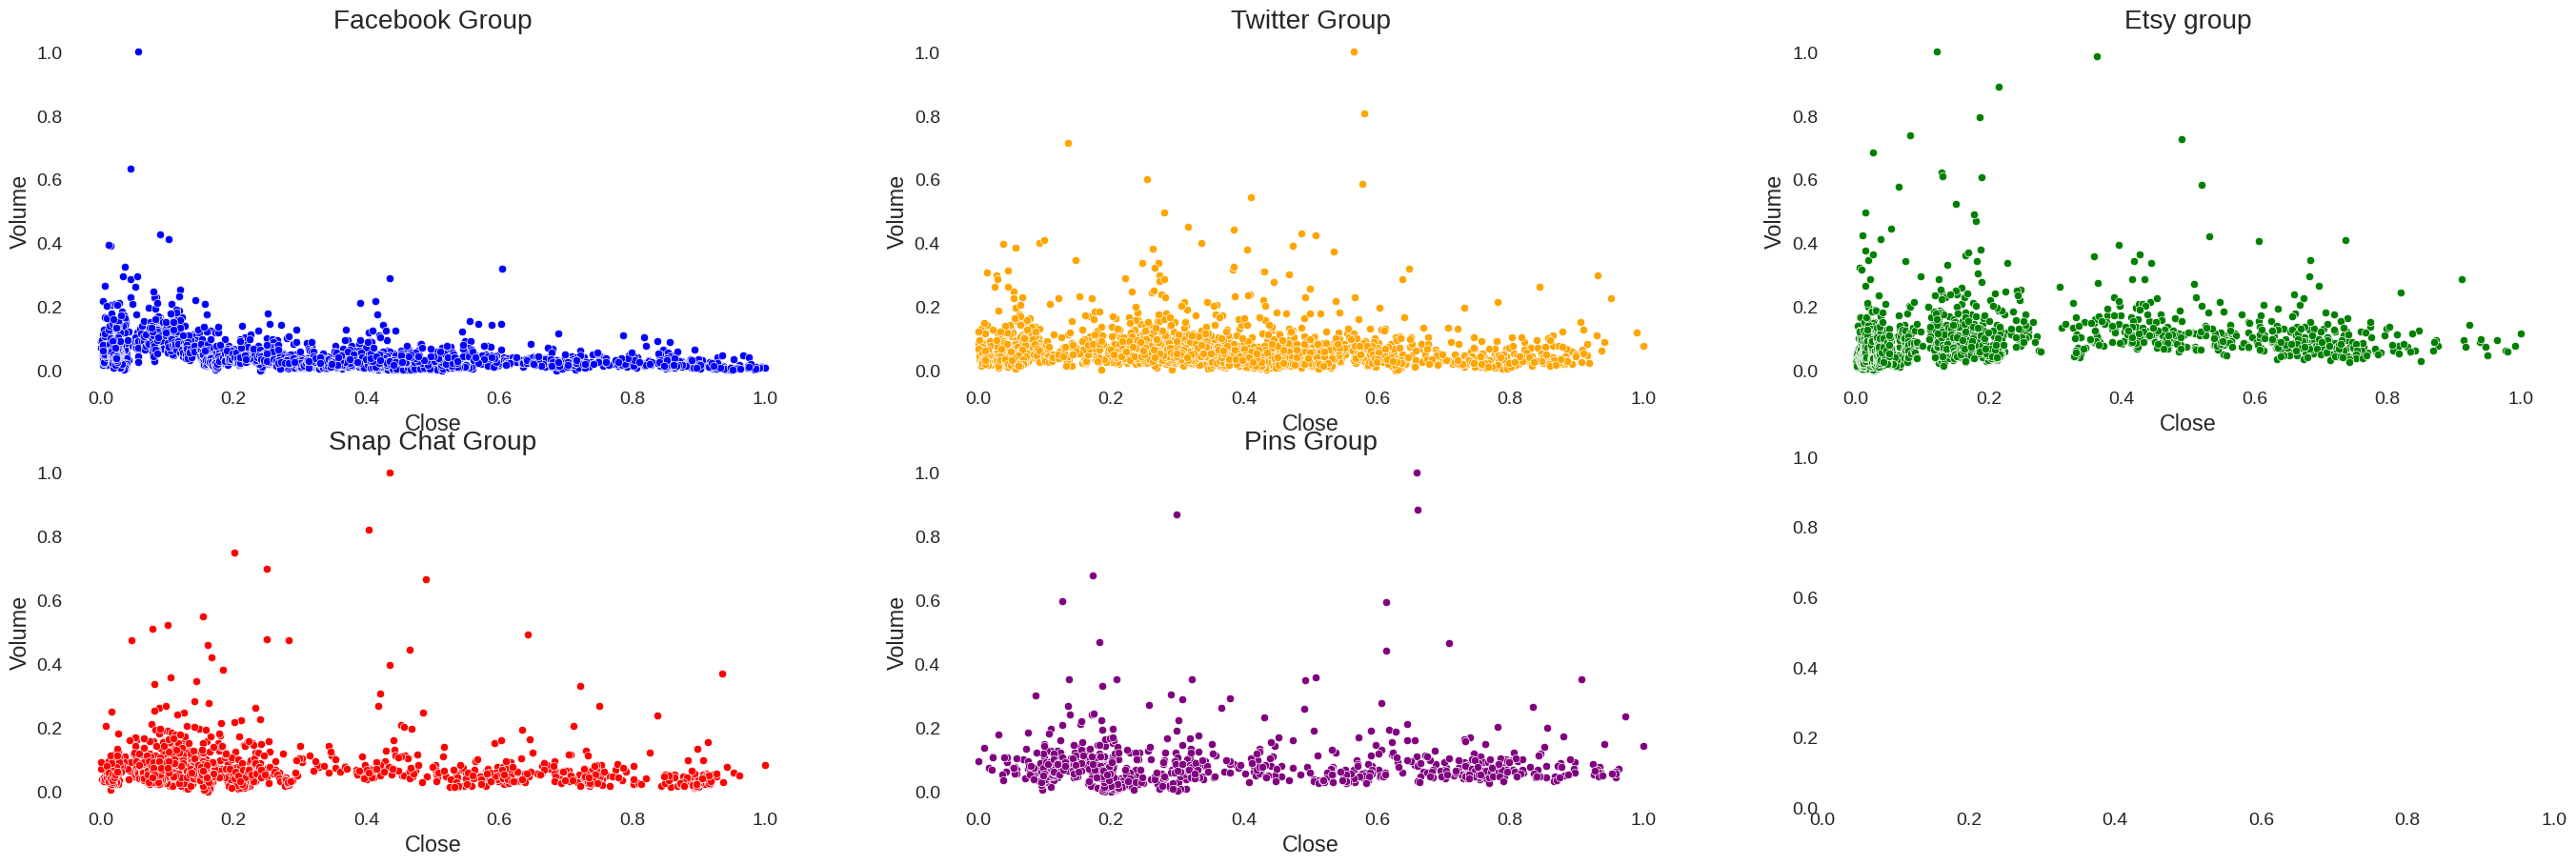

In [125]:
plt.style.use('seaborn-darkgrid')
fig, axs = plt.subplots(2, 3, figsize=(30, 10))

sns.scatterplot(data=df_escalado_FB, x="Close", y="Volume",ax=axs[0,0], color='blue')
sns.scatterplot(data=df_escalado_TW, x="Close", y="Volume",ax=axs[0,1], color='orange')
sns.scatterplot(data=df_escalado_ET, x="Close", y="Volume",ax=axs[0,2], color='green')
sns.scatterplot(data=df_escalado_SN, x="Close", y="Volume",ax=axs[1,0], color='red')
sns.scatterplot(data=df_escalado_PN, x="Close", y="Volume",ax=axs[1,1], color='purple')

axs[0, 0].set_title('Facebook Group')
axs[0, 1].set_title('Twitter Group')
axs[0, 2].set_title('Etsy group')
axs[1, 0].set_title('Snap Chat Group')
axs[1, 1].set_title('Pins Group')

plt.show()

**Modeling and Evaluation**

**Kmeans**

In [109]:
kmeans_FB = KMeans(n_clusters=3, random_state= 42).fit(df_escalado_FB)
kmeans_TW = KMeans(n_clusters=3, random_state= 42).fit(df_escalado_TW)
kmeans_ET = KMeans(n_clusters=3, random_state= 42).fit(df_escalado_ET)
kmeans_SN = KMeans(n_clusters=3, random_state= 42).fit(df_escalado_SN)
kmeans_PN = KMeans(n_clusters=3, random_state= 42).fit(df_escalado_PN)

centroids_FB = kmeans_FB.cluster_centers_
centroids_TW = kmeans_TW.cluster_centers_
centroids_ET = kmeans_ET.cluster_centers_
centroids_SN = kmeans_SN.cluster_centers_
centroids_PN = kmeans_PN.cluster_centers_

print(f"Facebook: {centroids_FB}\nTwitter: {centroids_TW}\nETSY: {centroids_ET}\nSNAP: {centroids_SN}\nPINS: {centroids_PN}")

Facebook: [[0.12012957 0.07022904]
 [0.78261225 0.02585646]
 [0.41084635 0.02699681]]
Twitter: [[0.35056665 0.06781799]
 [0.68854564 0.06095853]
 [0.08159545 0.06795493]]
ETSY: [[0.69093222 0.09678277]
 [0.07681399 0.07145364]
 [0.37650472 0.17539907]]
SNAP: [[0.12950056 0.0757801 ]
 [0.79711337 0.0552505 ]
 [0.52300545 0.08536902]]
PINS: [[0.78785863 0.08081084]
 [0.18758529 0.07933653]
 [0.51717371 0.11435924]]


In [110]:
labels_FB = kmeans_FB.predict(df_escalado_FB)
labels_TW = kmeans_TW.predict(df_escalado_TW)
labels_ET = kmeans_ET.predict(df_escalado_ET)
labels_SN = kmeans_SN.predict(df_escalado_SN)
labels_PN = kmeans_PN.predict(df_escalado_PN)

Analysis[
 - Yellow Group: low volume, high closing price group. The top two points could be considered outliers(Except Twitter)
 - Red Group: medium volume group and medium closing price (Except Twitter)
 - Blue Group: high volume and low closing price (Except Twitter)


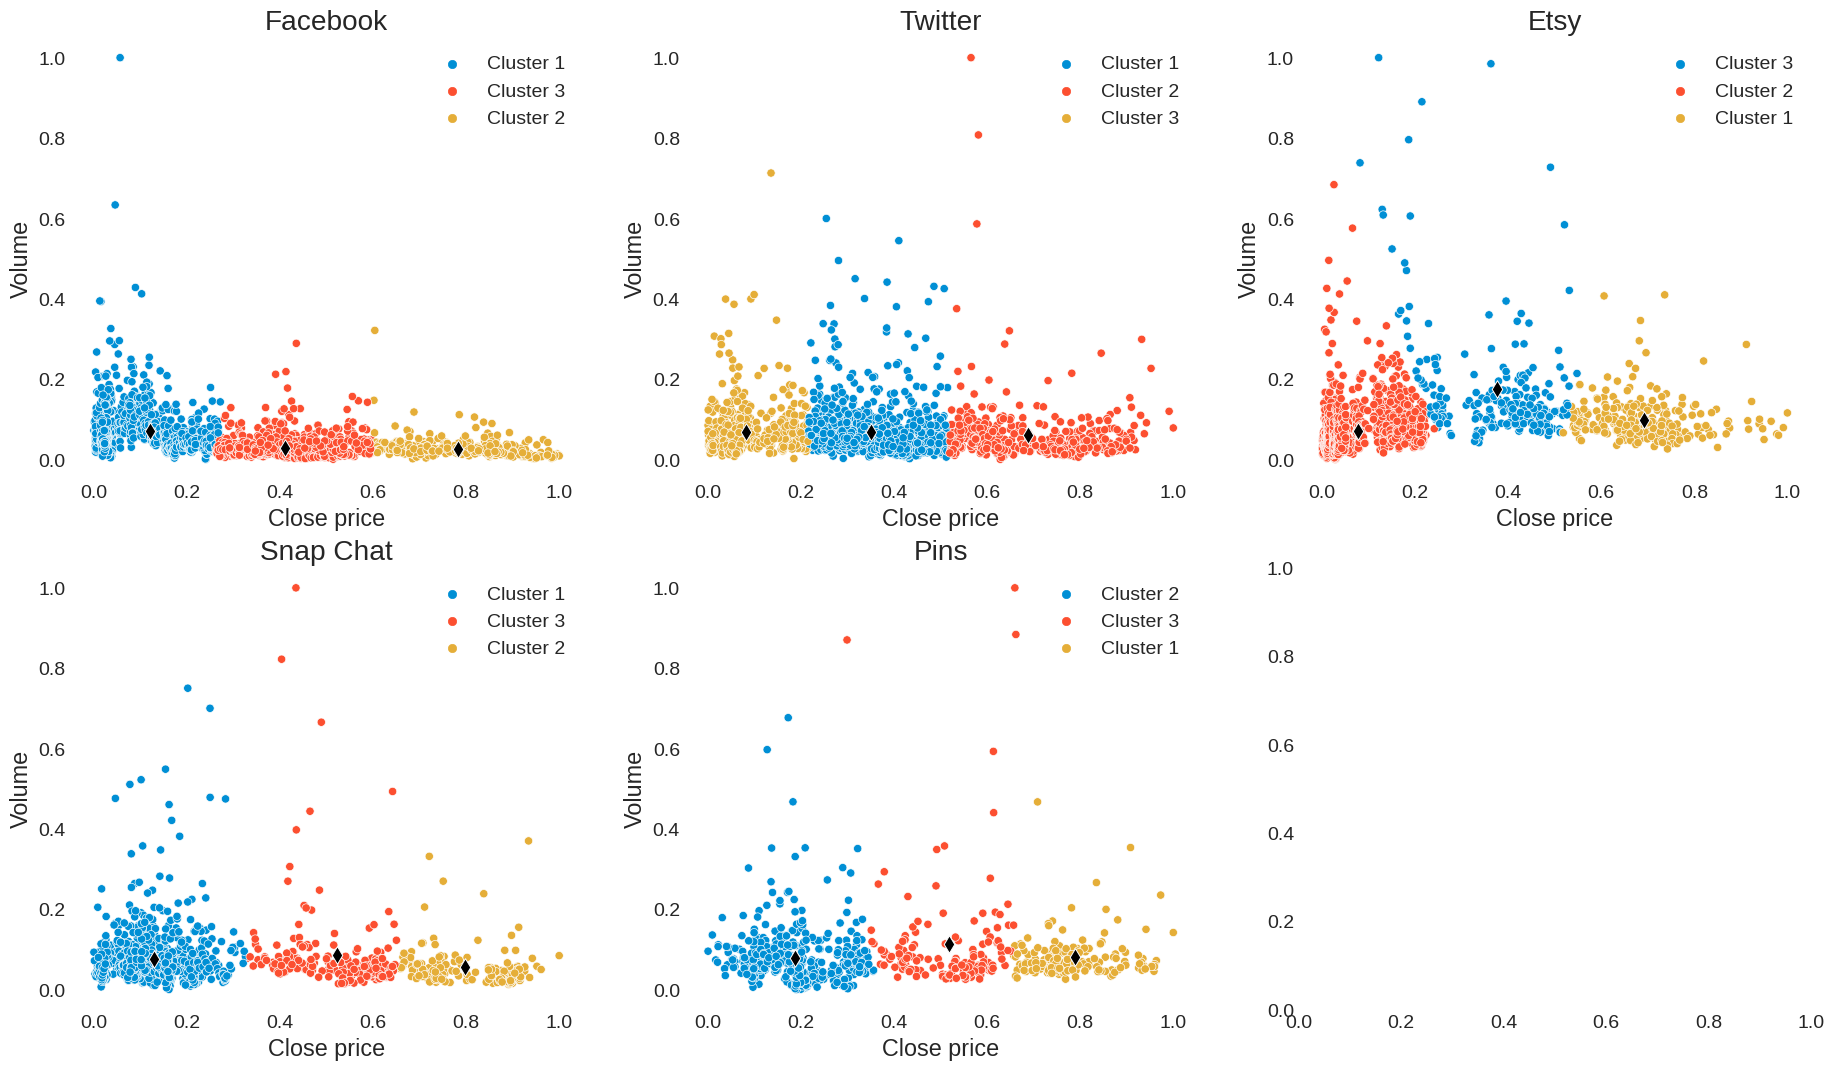

In [123]:
plt.style.use('seaborn-darkgrid')
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

colores_FB = ['Cluster 1', 'Cluster 2', 'Cluster 3']
colores_TW = ['Cluster 1', 'Cluster 2', 'Cluster 3']
colores_ET = ['Cluster 1', 'Cluster 2', 'Cluster 3']
colores_SN = ['Cluster 1', 'Cluster 2', 'Cluster 3']
colores_PN = ['Cluster 1', 'Cluster 2', 'Cluster 3']

asignar_FB = [colores_FB[A] for A in labels_FB]
asignar_TW = [colores_TW[y] for y in labels_TW]
asignar_ET = [colores_ET[C] for C in labels_ET]
asignar_SN = [colores_SN[D] for D in labels_SN]
asignar_PN = [colores_PN[E] for E in labels_PN]

# Subplot 1: df_escalado_FB
sns.scatterplot(data=df_escalado_FB, x="Close", y="Volume", hue=asignar_FB, ax=axs[0, 0])
sns.scatterplot(x=centroids_FB[:, 0], y=centroids_FB[:, 1], marker='d', c='black', s=80, ax=axs[0, 0])
axs[0, 0].set_title('Facebook')
axs[0, 0].set_xlabel('Close price')
axs[0, 0].set_ylabel('Volume')

# Subplot 2: df_escalado_TW
sns.scatterplot(data=df_escalado_TW, x="Close", y="Volume", hue=asignar_TW, ax=axs[0, 1])
sns.scatterplot(x=centroids_TW[:, 0], y=centroids_TW[:, 1], marker='d', c='black', s=80, ax=axs[0, 1])
axs[0, 1].set_title('Twitter')
axs[0, 1].set_xlabel('Close price')
axs[0, 1].set_ylabel('Volume')

# Subplot 3: df_escalado_ET
sns.scatterplot(data=df_escalado_ET, x="Close", y="Volume", hue=asignar_ET, ax=axs[0, 2])
sns.scatterplot(x=centroids_ET[:, 0], y=centroids_ET[:, 1], marker='d', c='black', s=80, ax=axs[0, 2])
axs[0, 2].set_title('Etsy')
axs[0, 2].set_xlabel('Close price')
axs[0, 2].set_ylabel('Volume')

# Subplot 4: df_escalado_SN
sns.scatterplot(data=df_escalado_SN, x="Close", y="Volume", hue=asignar_SN, ax=axs[1, 0])
sns.scatterplot(x=centroids_SN[:, 0], y=centroids_SN[:, 1], marker='d', c='black', s=80, ax=axs[1, 0])
axs[1, 0].set_title('Snap Chat')
axs[1, 0].set_xlabel('Close price')
axs[1, 0].set_ylabel('Volume')

# Subplot 5: df_escalado_PN
sns.scatterplot(data=df_escalado_PN, x="Close", y="Volume", hue=asignar_PN, ax=axs[1, 1])
sns.scatterplot(x=centroids_PN[:, 0], y=centroids_PN[:, 1], marker='d', c='black', s=80, ax=axs[1, 1])
axs[1, 1].set_title('Pins')
axs[1, 1].set_xlabel('Close price')
axs[1, 1].set_ylabel('Volume')
print("\033[1mAnalysis\033[")
print(" - \033[1mYellow Group:\033[0m low volume, high closing price group. The top two points could be considered outliers(Except Twitter)")
print(" - \033[1mRed Group:\033[0m medium volume group and medium closing price (Except Twitter)")
print(" - \033[1mBlue Group:\033[0m high volume and low closing price (Except Twitter)")

plt.show()

In [121]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score del model K-means Facebook: {silhouette_score(df_escalado_FB, labels_FB)}')
print(f'inertia del model K-means Facebook: {kmeans_FB.inertia_}')
print('\n')
print(f'Silhouette Score del model K-means Twitter: {silhouette_score(df_escalado_TW, labels_TW)}')
print(f'inertia del model K-means Twitter: {kmeans_TW.inertia_}')
print('\n')
print(f'Silhouette Score del model K-means Etsy: {silhouette_score(df_escalado_ET, labels_ET)}')
print(f'inertia del model K-means Et: {kmeans_ET.inertia_}')
print('\n')
print(f'Silhouette Score del model K-means Snap Chat: {silhouette_score(df_escalado_SN, labels_SN)}')
print(f'inertia del model K-means Snap Chat: {kmeans_SN.inertia_}')
print('\n')
print(f'Silhouette Score del model K-means Pins: {silhouette_score(df_escalado_PN, labels_PN)}')
print(f'inertia del model K-means Pins: {kmeans_PN.inertia_}')

Silhouette Score del model K-means Facebook: 0.5861686848742896
inertia del model K-means Facebook: 23.06383715141701


Silhouette Score del model K-means Twitter: 0.5402668681297537
inertia del model K-means Twitter: 23.827472971109263


Silhouette Score del model K-means Etsy: 0.6200990774052555
inertia del model K-means Et: 21.238289601005402


Silhouette Score del model K-means Snap Chat: 0.6711356739406044
inertia del model K-means Snap Chat: 13.83053561145609


Silhouette Score del model K-means Pins: 0.5773383016967382
inertia del model K-means Pins: 10.395861573415653
